### Clustering tf-idf vectors

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster
from sklearn.metrics import silhouette_score

In [9]:
#load data
lectures = pd.read_csv('all_lecture_text.csv')
X = lectures.d2v_text
y = lectures.Subject

## KMeans Clustering with ascending min_df in tf-idf

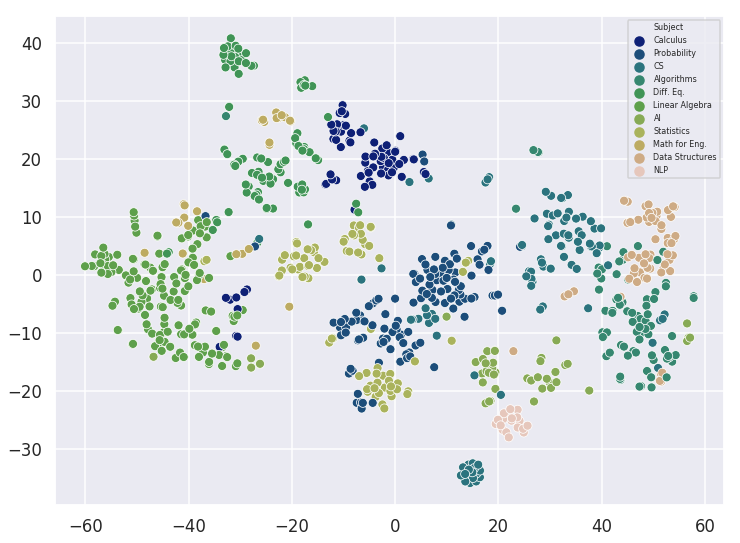

tfidf min_df: 3
Best Number of Clusters: 35, Sillhouette score:0.1423148684444294


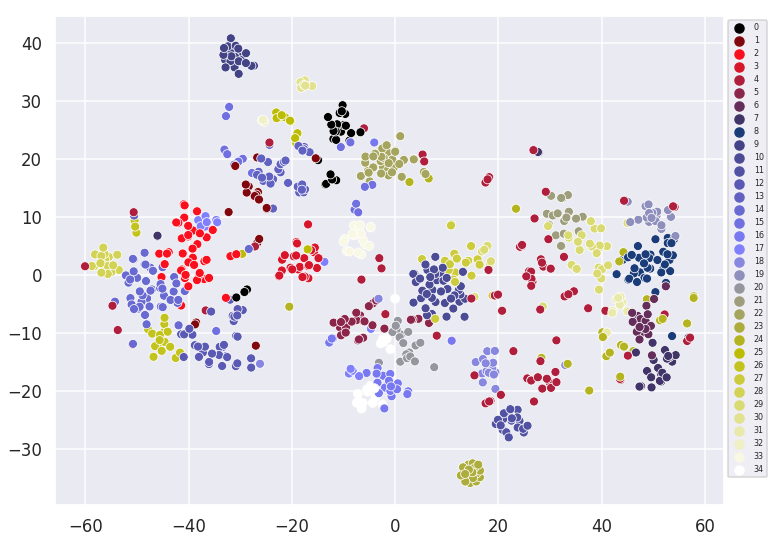

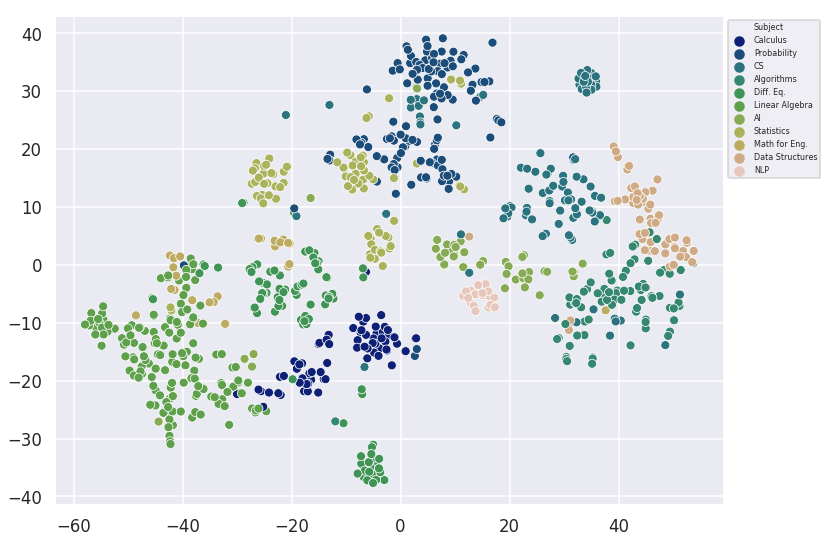

tfidf min_df: 6
Best Number of Clusters: 47, Sillhouette score:0.15668530986413085


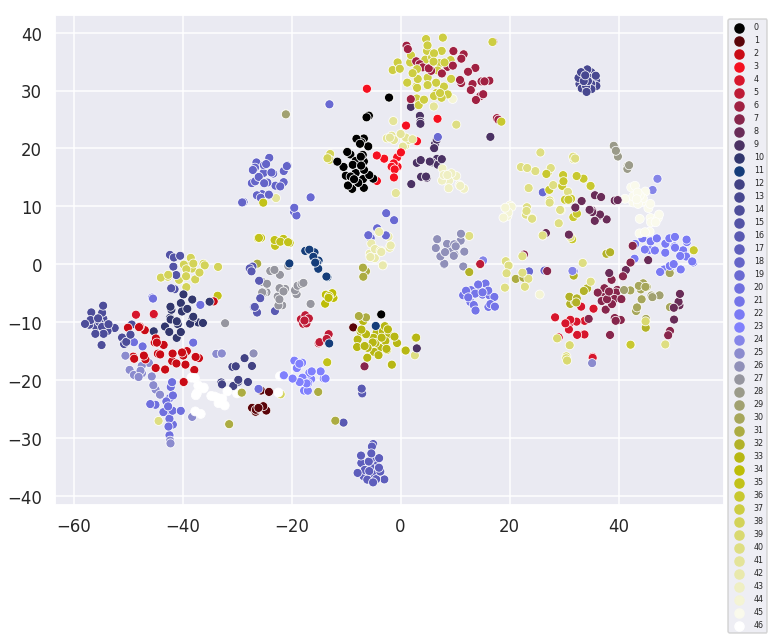

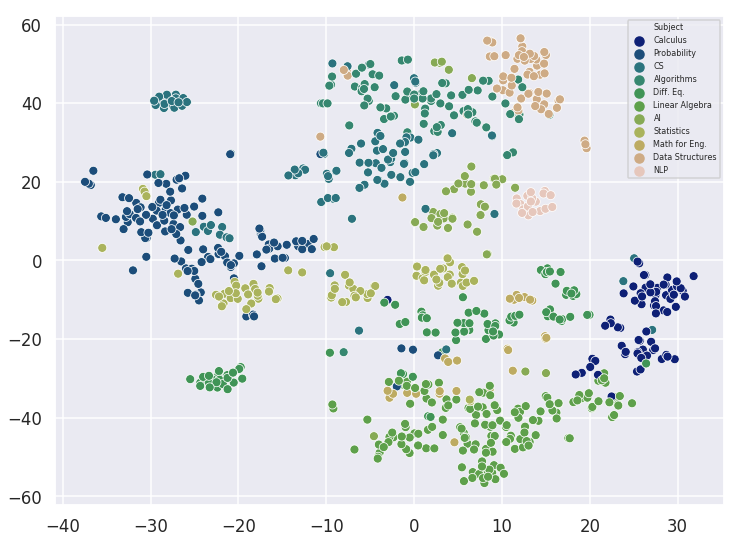

tfidf min_df: 9
Best Number of Clusters: 41, Sillhouette score:0.1639195336214216


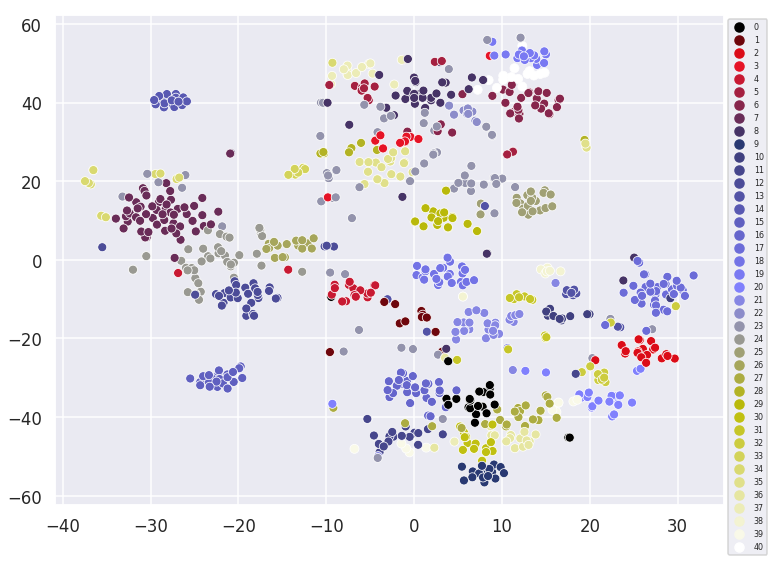

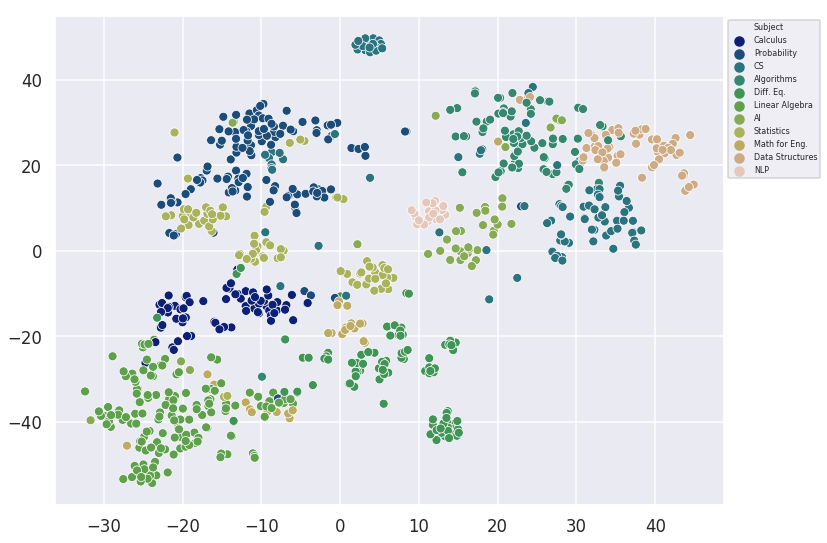

tfidf min_df: 12
Best Number of Clusters: 41, Sillhouette score:0.16054279058701454


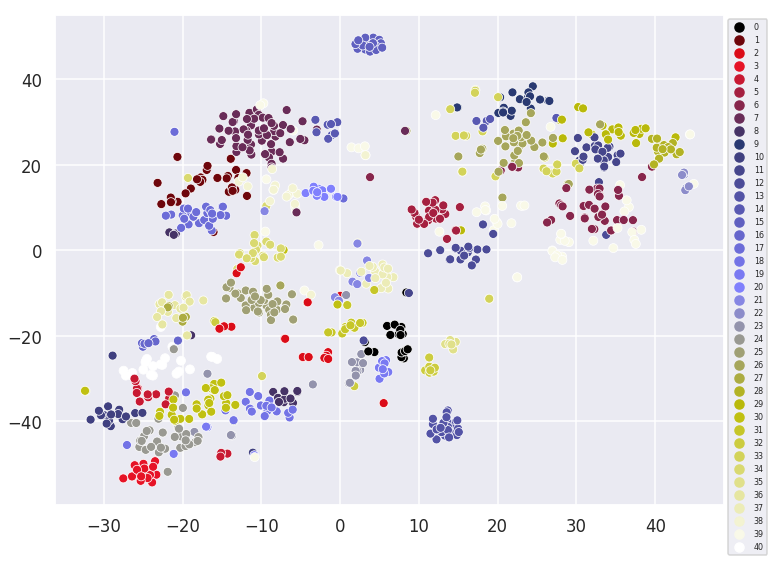

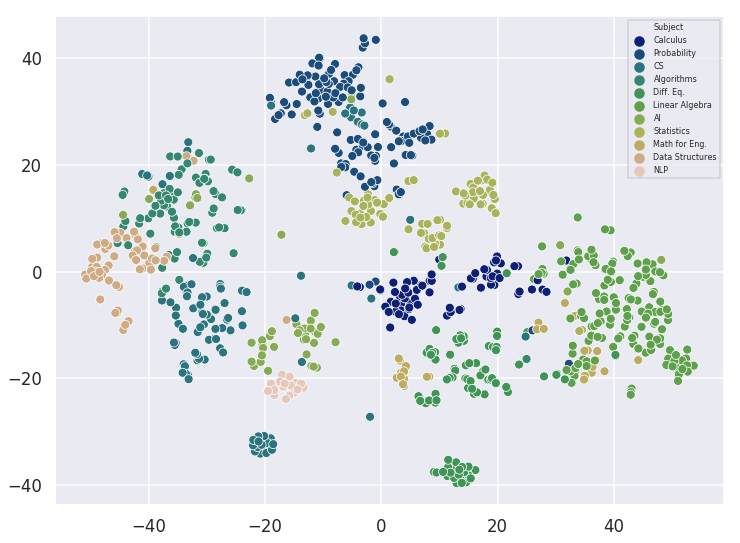

tfidf min_df: 15
Best Number of Clusters: 44, Sillhouette score:0.17109758548958878


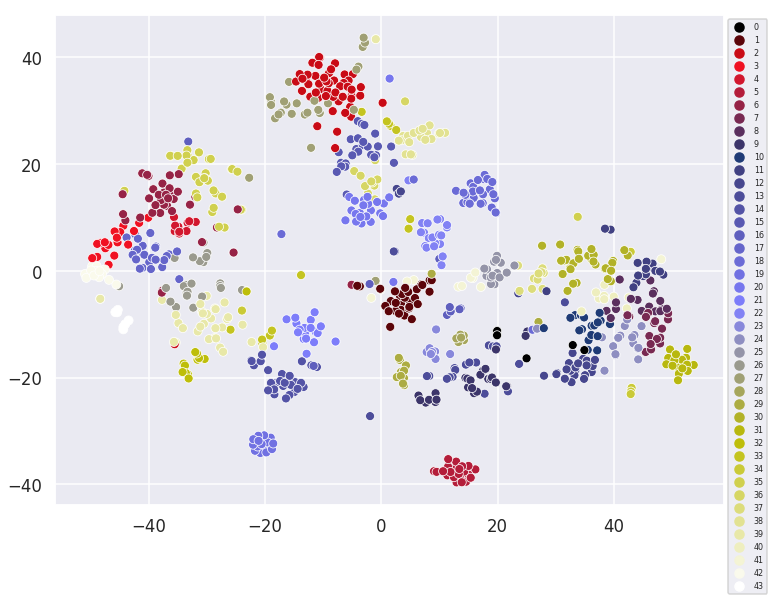

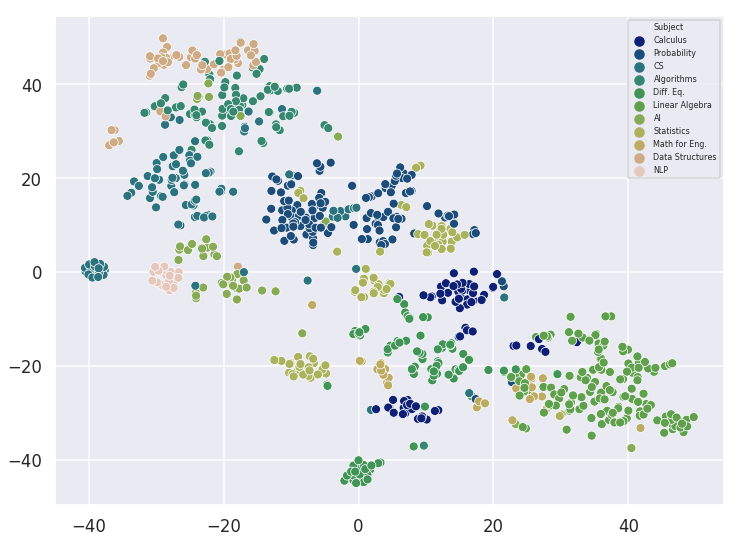

tfidf min_df: 18
Best Number of Clusters: 47, Sillhouette score:0.16768879477642232


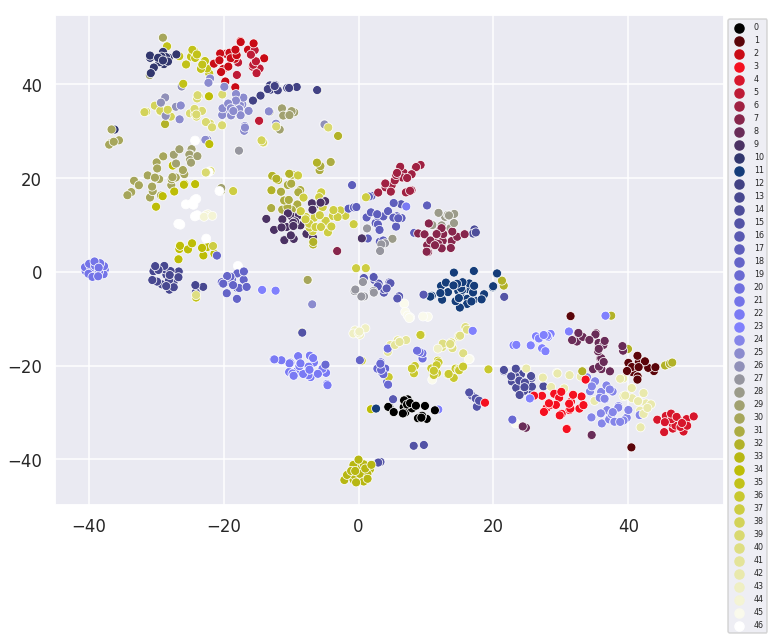

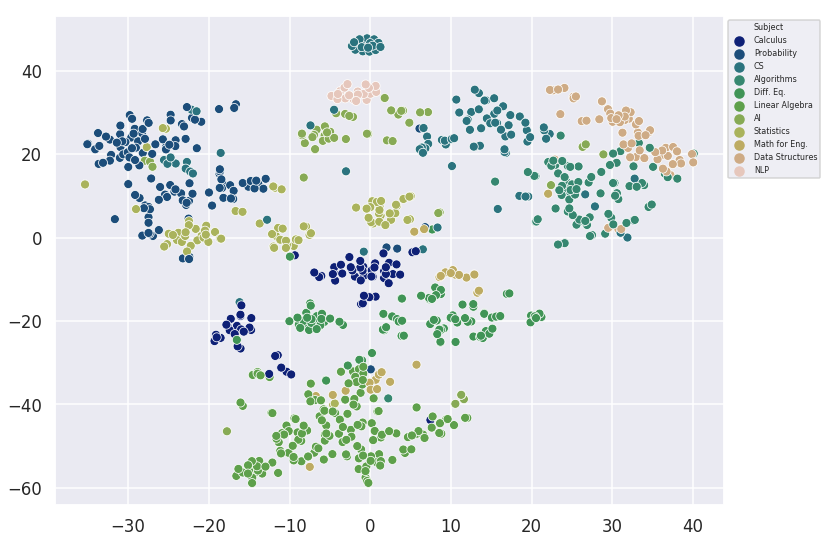

tfidf min_df: 21
Best Number of Clusters: 41, Sillhouette score:0.17190636925433064


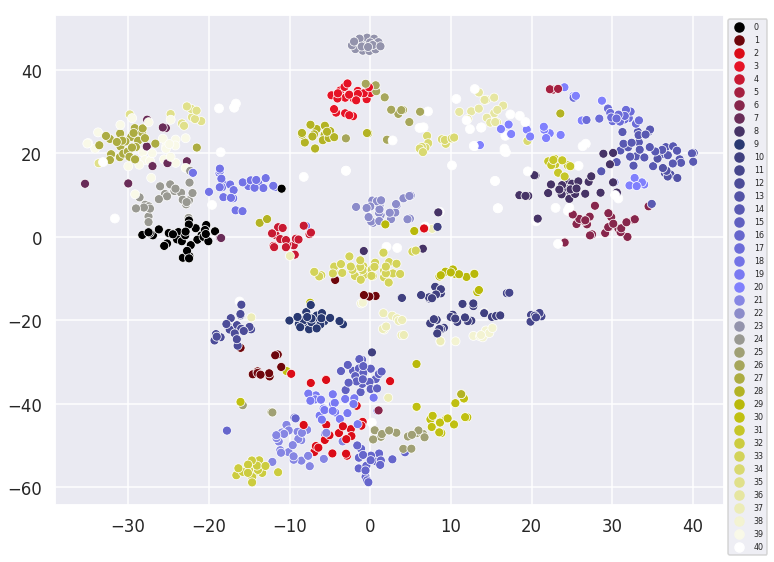

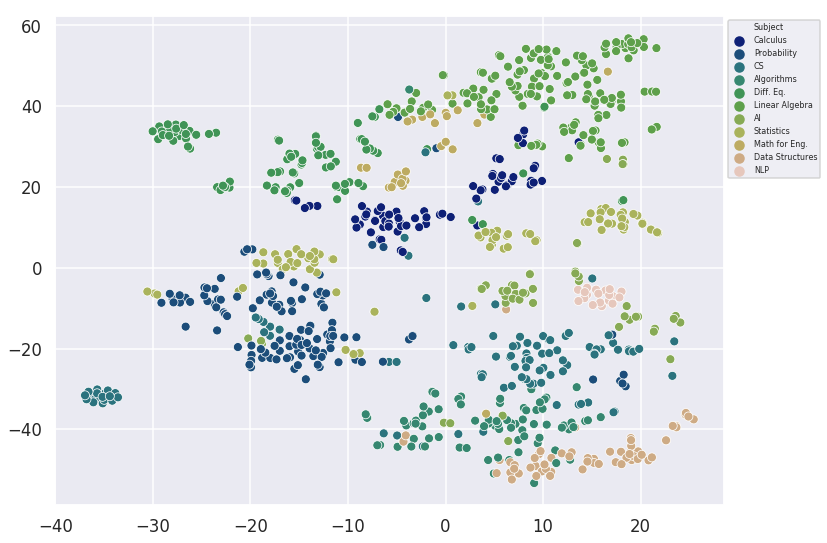

tfidf min_df: 24
Best Number of Clusters: 47, Sillhouette score:0.18009437970323164


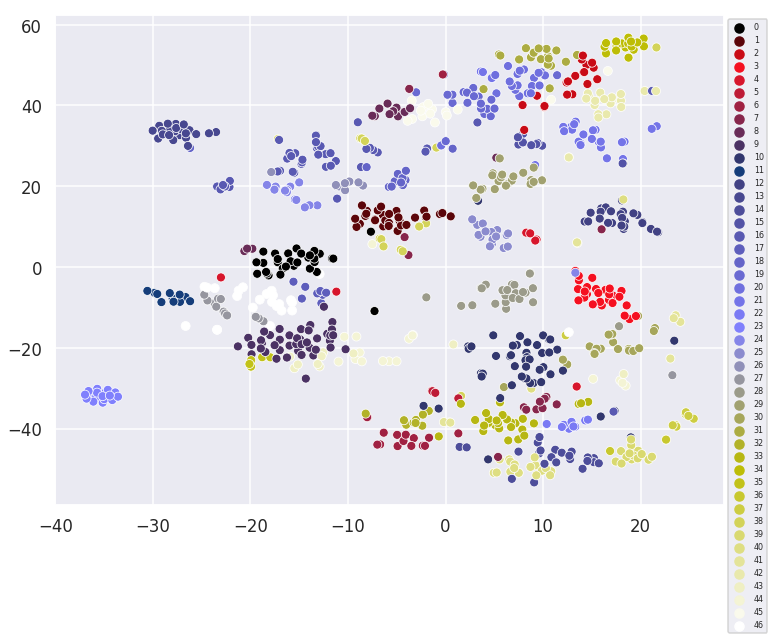

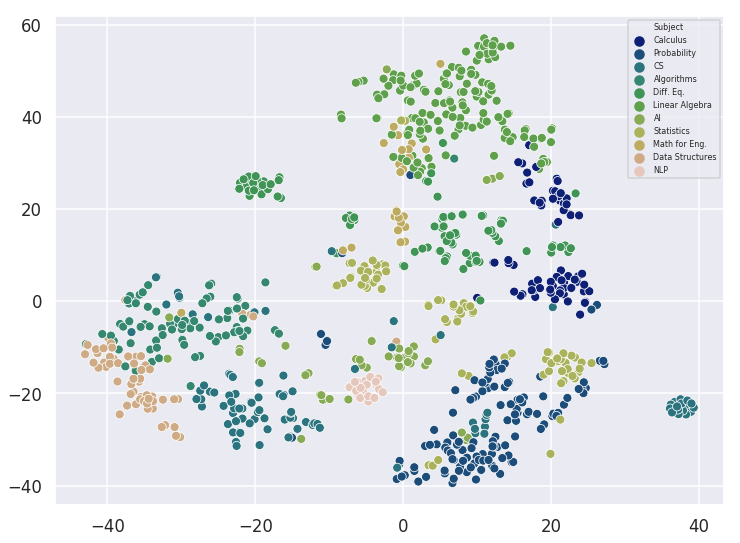

tfidf min_df: 27
Best Number of Clusters: 38, Sillhouette score:0.1765810478085612


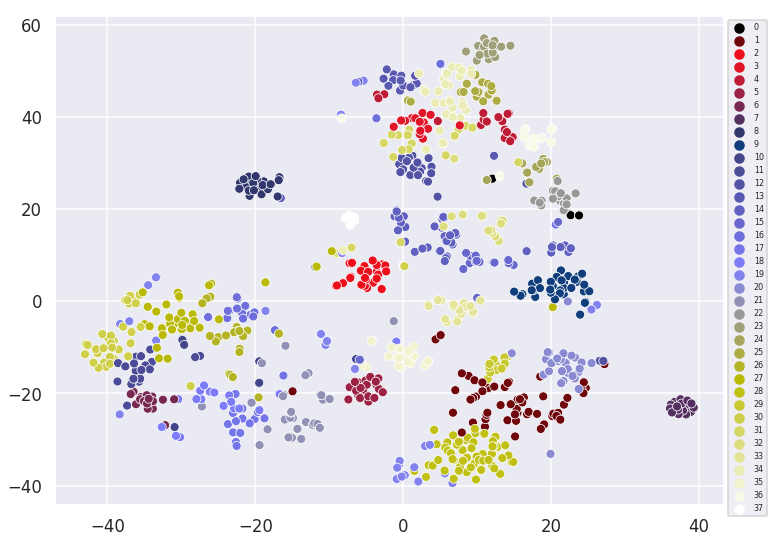

In [41]:
min_dfs = []
n_clusts = []
sil_scores = []

sns.set(style='darkgrid', context='talk')
tsne = TSNE(2,random_state=43)
for number in range(3,30,3):
    vectorizer = TfidfVectorizer(max_df=0.50, # drop words that occur in more 50% of the sentences
                                 min_df=number, # only use words that appear at least 25
                                 stop_words='english', #use english stopwords
                                 lowercase=True, #lowercase
                                 use_idf=True, #idf
                                 norm=u'l2',  #normalization
                                 smooth_idf=True)#add 1 to all words to prevent 0 division
    
    X_idf = vectorizer.fit_transform(X)
    vecs = X_idf.todense()
    tsne_df = tsne.fit_transform(vecs)
    plt.figure(figsize=(12,9))
    sns.scatterplot(x=tsne_df[:,0],y=tsne_df[:,1],hue=y, legend='full', palette='gist_earth')
    plt.legend(prop={'size': 8},bbox_to_anchor=[1,1])
    plt.show()
    fnclusts = []
    fsscores = [] 
    
    for no in range(8,50,3):
        
        fd2v_clusters = cluster.KMeans(n_clusters=no, random_state=43).fit_predict(vecs)    
        fnclusts.append(no)
        fsscores.append(silhouette_score(vecs, fd2v_clusters, metric='cosine'))
    print("tfidf min_df: {}".format(number))
    print('Best Number of Clusters: {}, Sillhouette score:{}'.format(fnclusts[np.argmax(fsscores)],max(fsscores)))
        
    d2v_clusters = cluster.KMeans(n_clusters=fnclusts[np.argmax(fsscores)], random_state=43).fit_predict(vecs)
    plt.figure(figsize=(12,9))
    sns.scatterplot(x=tsne_df[:,0],y=tsne_df[:,1],hue=d2v_clusters, legend='full', palette='gist_stern')
    plt.legend(prop={'size': 8}, bbox_to_anchor=[1,1])
    plt.show()
    min_dfs.append(number)
    n_clusts.append(fnclusts[np.argmax(fsscores)])
    sil_scores.append(max(fsscores))

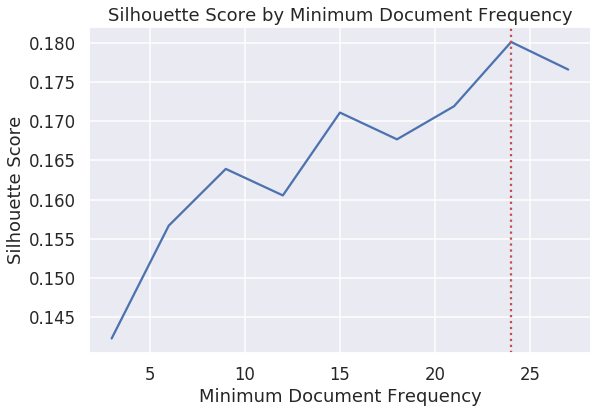

Max Silhouette Score: 0.1801, Number of Clusters: 47, Best min_df: 24


In [64]:
df = pd.DataFrame()
df['min_df'] = min_dfs
df['n_clusts'] = n_clusts
df['s_score'] = sil_scores
plt.figure(figsize=(9,6))
sns.lineplot(x=df.min_df,y=df.s_score)
plt.title('Silhouette Score by Minimum Document Frequency')
plt.xlabel('Minimum Document Frequency')
plt.ylabel('Silhouette Score')
plt.axvline(df['min_df'][np.argmax(df['s_score'])],color='r',linestyle='dotted')
plt.show()
print('Max Silhouette Score: {}, Number of Clusters: {}, Best min_df: {}'.format(
        round(max(df['s_score']),4),df['n_clusts'][np.argmax(df['s_score'])],df['min_df'][np.argmax(df['s_score'])]))

In [53]:
df.sort_values(by='s_score',ascending=False)

min_df  n_clusts   s_score
7      24        47  0.180094
8      27        38  0.176581
6      21        41  0.171906
4      15        44  0.171098
5      18        47  0.167689
2       9        41  0.163920
3      12        41  0.160543
1       6        47  0.156685
0       3        35  0.142315

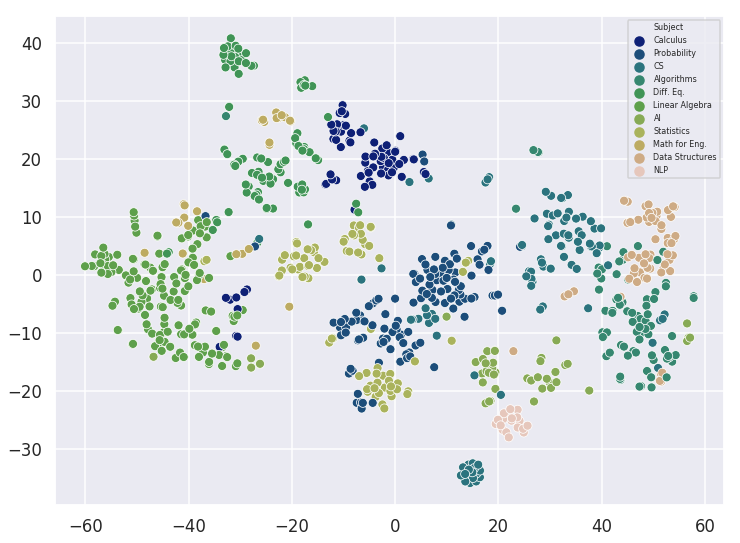

tfidf min_df: 3
Best Number of Clusters: 35, Sillhouette score:0.10497466604860341


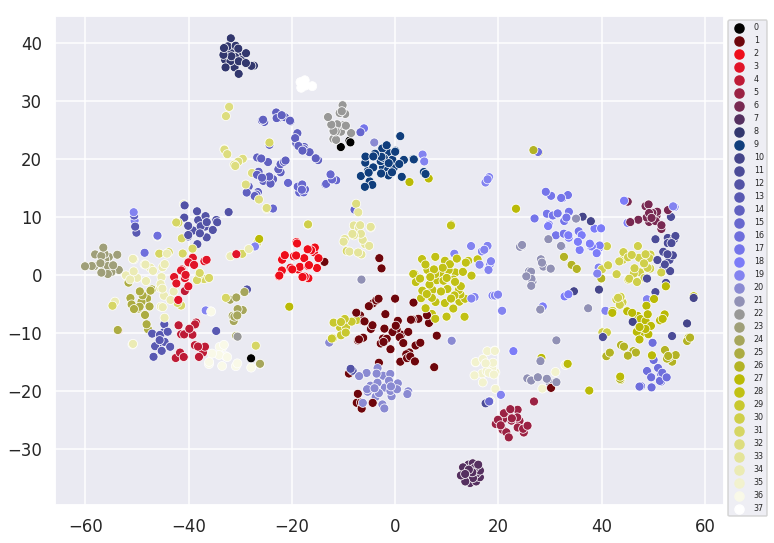

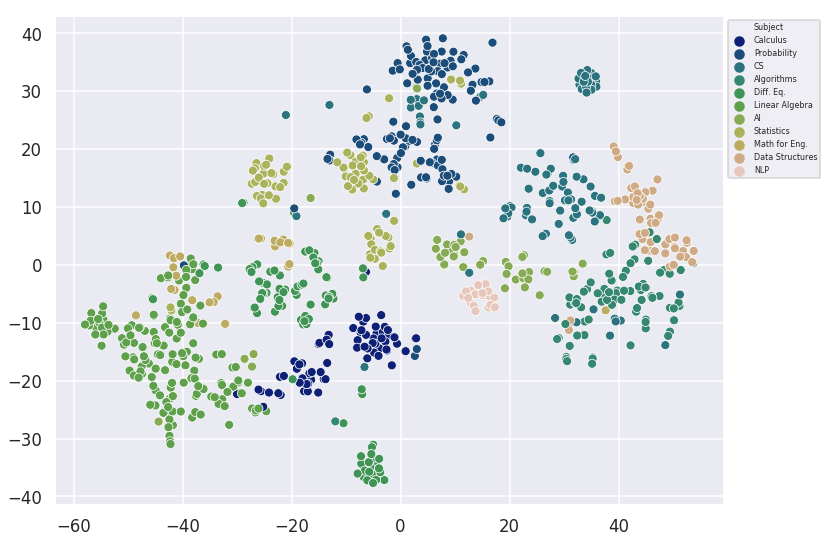

tfidf min_df: 6
Best Number of Clusters: 47, Sillhouette score:0.12351455813410338


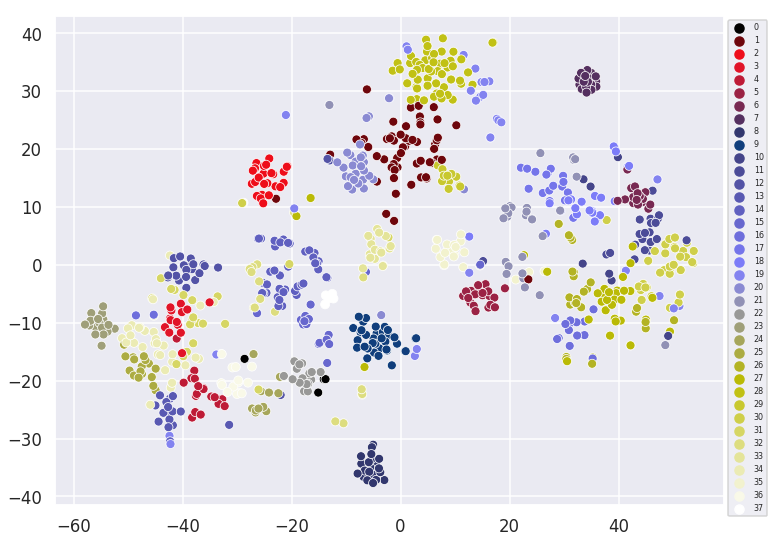

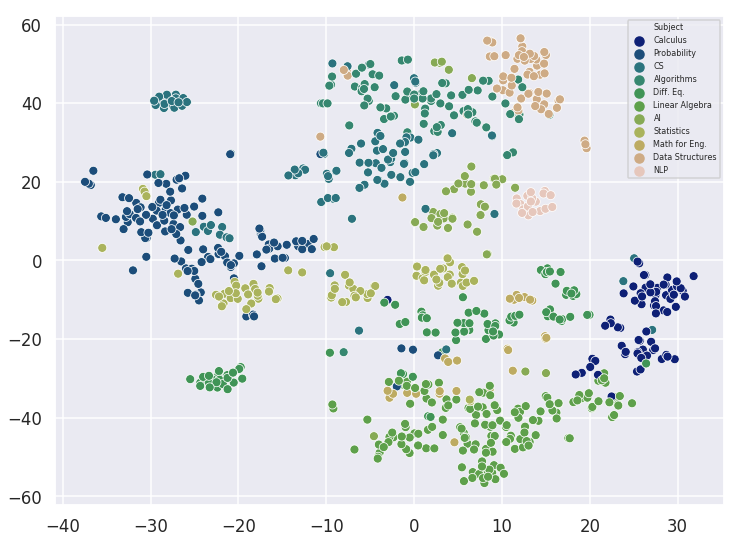

tfidf min_df: 9
Best Number of Clusters: 47, Sillhouette score:0.12677067628011904


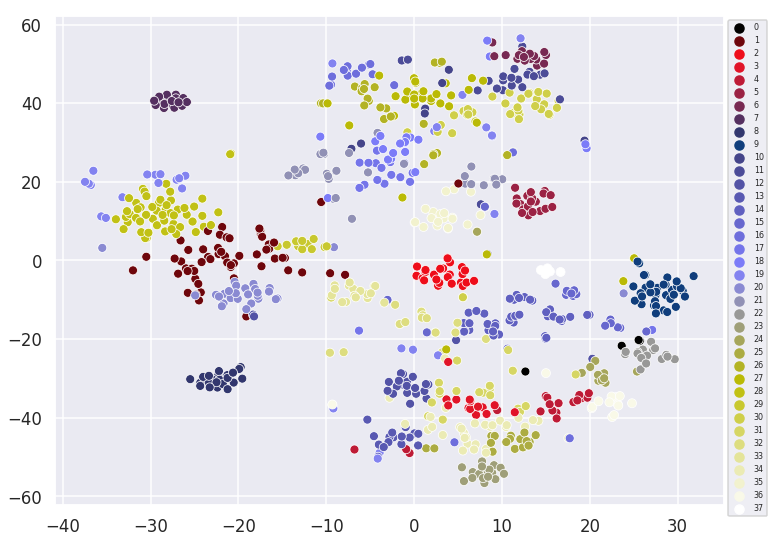

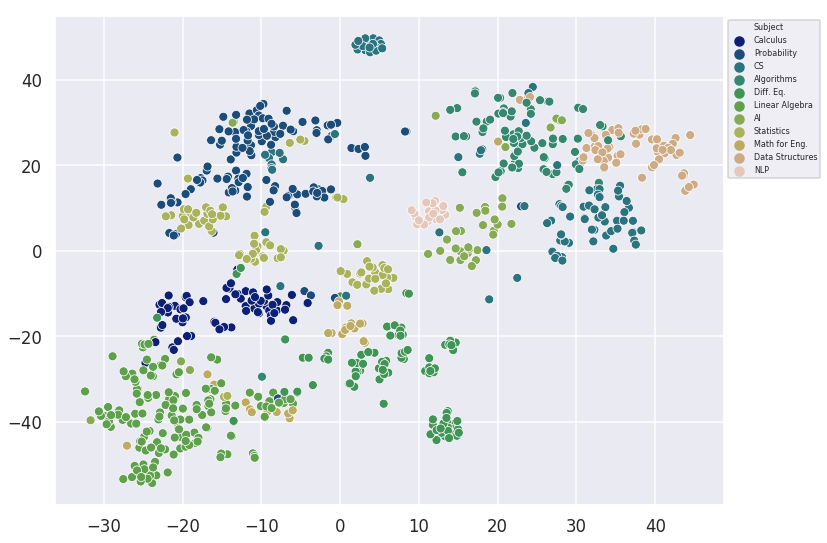

tfidf min_df: 12
Best Number of Clusters: 47, Sillhouette score:0.12812861997126535


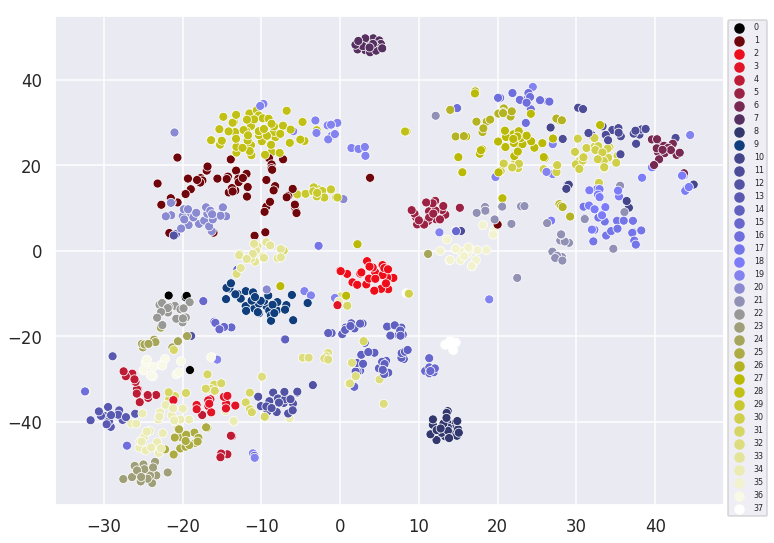

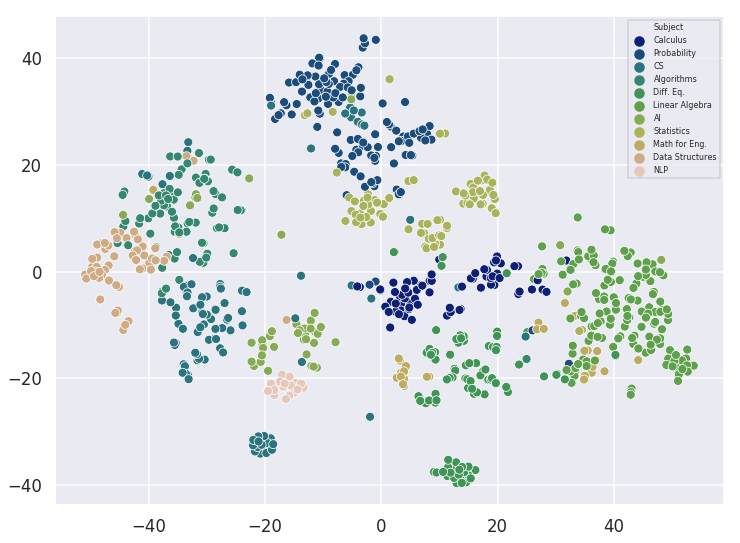

tfidf min_df: 15
Best Number of Clusters: 47, Sillhouette score:0.12567312698091535


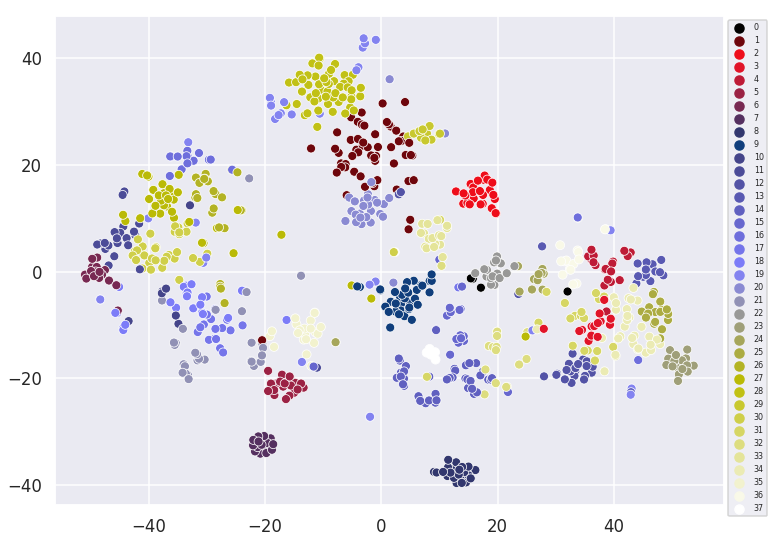

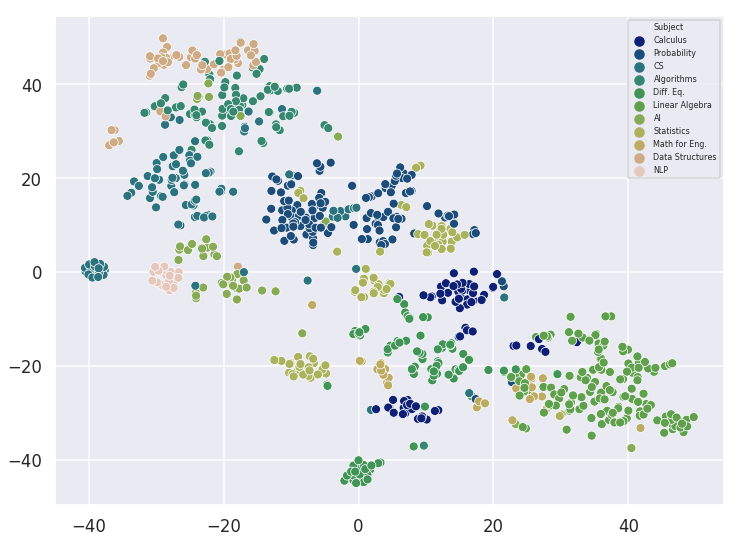

tfidf min_df: 18
Best Number of Clusters: 47, Sillhouette score:0.128419369224903


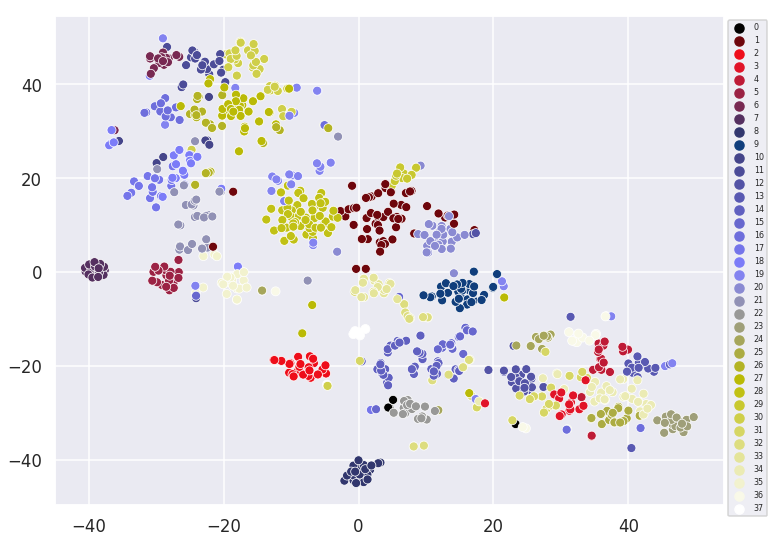

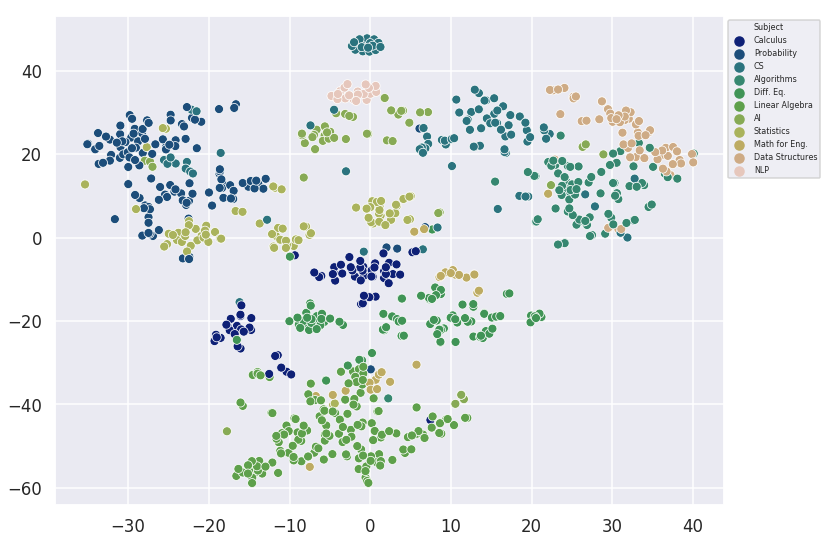

tfidf min_df: 21
Best Number of Clusters: 47, Sillhouette score:0.12756329754660545


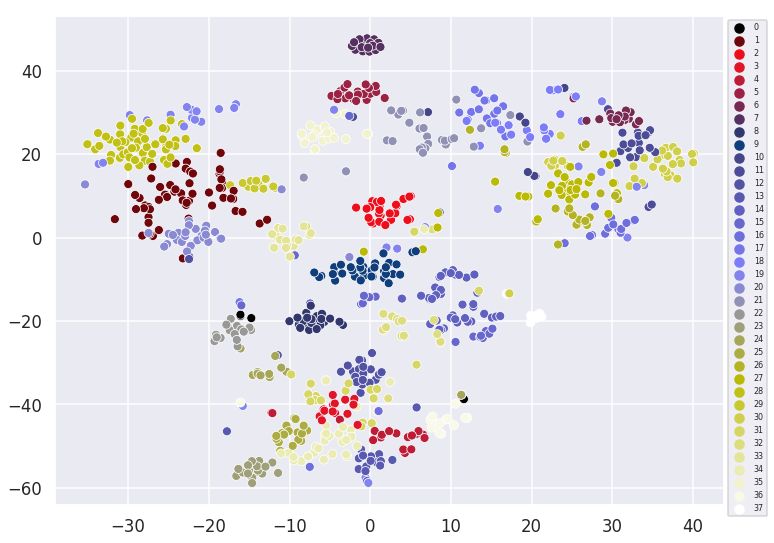

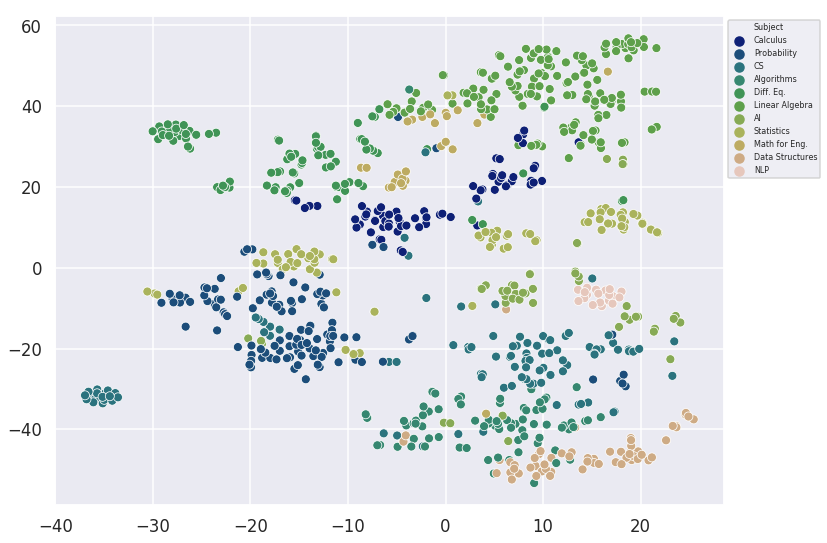

tfidf min_df: 24
Best Number of Clusters: 47, Sillhouette score:0.12592732607183021


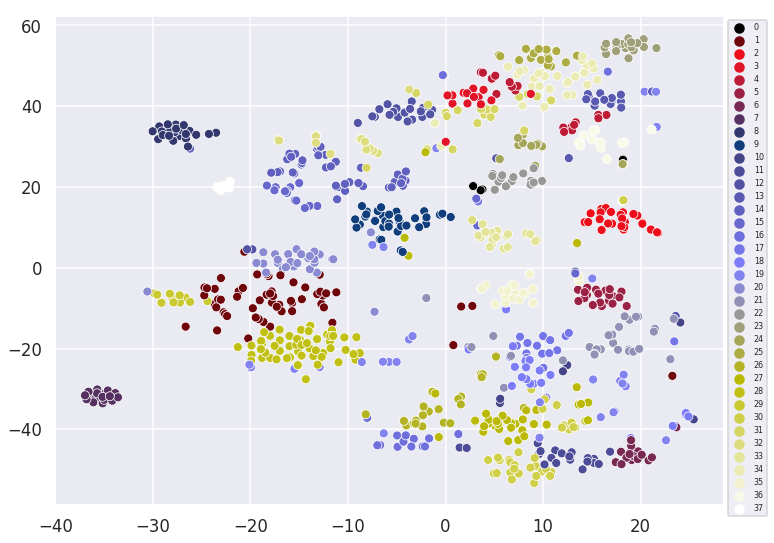

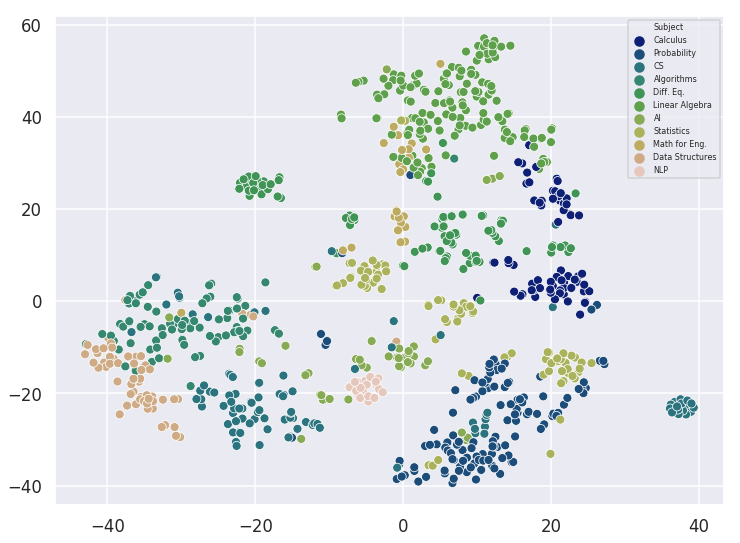

tfidf min_df: 27
Best Number of Clusters: 44, Sillhouette score:0.12965859922172135


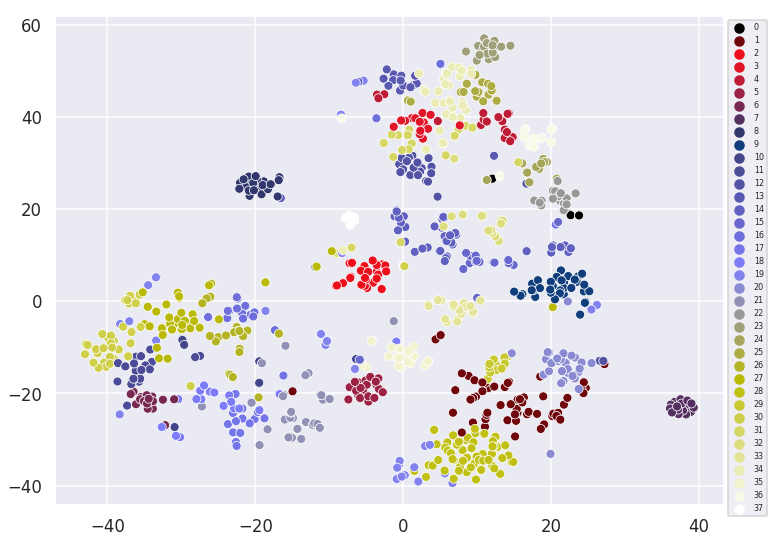

In [67]:
min_dfs = []
n_clusts = []
sil_scores = []

sns.set(style='darkgrid', context='talk')
tsne = TSNE(2,random_state=43)
for number in range(3,30,3):
    vectorizer = TfidfVectorizer(max_df=0.50, # drop words that occur in more 50% of the sentences
                                 min_df=number, # only use words that appear at least 25
                                 stop_words='english', #use english stopwords
                                 lowercase=True, #lowercase
                                 use_idf=True, #idf
                                 norm=u'l2',  #normalization
                                 smooth_idf=True)#add 1 to all words to prevent 0 division
    
    X_idf = vectorizer.fit_transform(X)
    vecs = X_idf.todense()
    tsne_df = tsne.fit_transform(vecs)
    plt.figure(figsize=(12,9))
    #drawscatter plot for each tf-idf iteration
    sns.scatterplot(x=tsne_df[:,0],y=tsne_df[:,1],hue=y, legend='full', palette='gist_earth')
    plt.legend(prop={'size': 8},bbox_to_anchor=[1,1])
    plt.show()    
    
    #Cluster the vectors from 8 to 50 clusters
    fnclusts = []
    fsscores = [] 
    for no in range(8,50,3):        
        agglo = cluster.AgglomerativeClustering(n_clusters=no, affinity='cosine',linkage='average').fit_predict(vecs)    
        fnclusts.append(no)
        fsscores.append(silhouette_score(vecs, agglo, metric='cosine'))
    #for each round of clustering, print the best performer and t-SNE  
    print("tfidf min_df: {}".format(number))
    print('Best Number of Clusters: {}, Sillhouette score:{}'.format(fnclusts[np.argmax(fsscores)],max(fsscores)))
        
    agglo = cluster.AgglomerativeClustering(n_clusters=fnclusts[np.argmax(fsscores)]).fit_predict(vecs)
    plt.figure(figsize=(12,9))
    sns.scatterplot(x=tsne_df[:,0],y=tsne_df[:,1],hue=d2v_clusters, legend='full', palette='gist_stern')
    plt.legend(prop={'size': 8}, bbox_to_anchor=[1,1])
    plt.show()
    min_dfs.append(number)
    n_clusts.append(fnclusts[np.argmax(fsscores)])
    sil_scores.append(max(fsscores))

/home/extralime/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


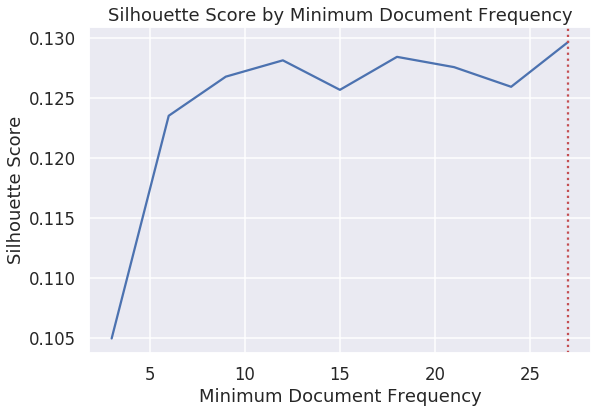

Max Silhouette Score: 0.1297, Number of Clusters: 44, Best min_df: 27


In [70]:
df1 = pd.DataFrame()
df1['min_df'] = min_dfs
df1['n_clusts'] = n_clusts
df1['s_score'] = sil_scores
plt.figure(figsize=(9,6))
sns.lineplot(x=df1.min_df,y=df1.s_score)
plt.title('Silhouette Score by Minimum Document Frequency')
plt.xlabel('Minimum Document Frequency')
plt.ylabel('Silhouette Score')
plt.axvline(df1['min_df'][np.argmax(df1['s_score'])],color='r',linestyle='dotted')
plt.show()
print('Max Silhouette Score: {}, Number of Clusters: {}, Best min_df: {}'.format(
        round(max(df1['s_score']),4),df1['n_clusts'][np.argmax(df1['s_score'])],df1['min_df'][np.argmax(df1['s_score'])]))

## Cosine Similarity

In [78]:
lectures.head()

Subject                                              title  \
0     Calculus  Lec 39 | MIT 18.01 Single Variable Calculus, F...   
1  Probability             S01.0 Mathematical Background Overview   
2           CS                     8. Object Oriented Programming   
3   Algorithms               Recitation 9b: DNA Sequence Matching   
4   Algorithms                                 R10. Quiz 1 Review   

                                            d2v_text  
0   PROFESSOR: So ||Comma||  ||Return|| Professor...  
1  concepts ||Period||  I should say that ||Retur...  
2  FESSOR: All right everyone ||Period||  Let's g...  
3  OFESSOR: The things we ||Return|| can talk abo...  
4  FESSOR: All right ||Period||  So I brought a f...

In [80]:
from sklearn.metrics.pairwise import cosine_similarity
tf_sim = pd.DataFrame(cosine_similarity(vecs), index=lectures.title, columns=lectures.title)

In [87]:
heat_df = pd.DataFrame(cosine_similarity(vecs))
#heat_df['subjects'] = lectures.Subject.reset_index(drop=True)
#Calculate mean similarity of each lecture
heat_df.insert(0, 'mean_similarity', heat_df.mean(axis=1))


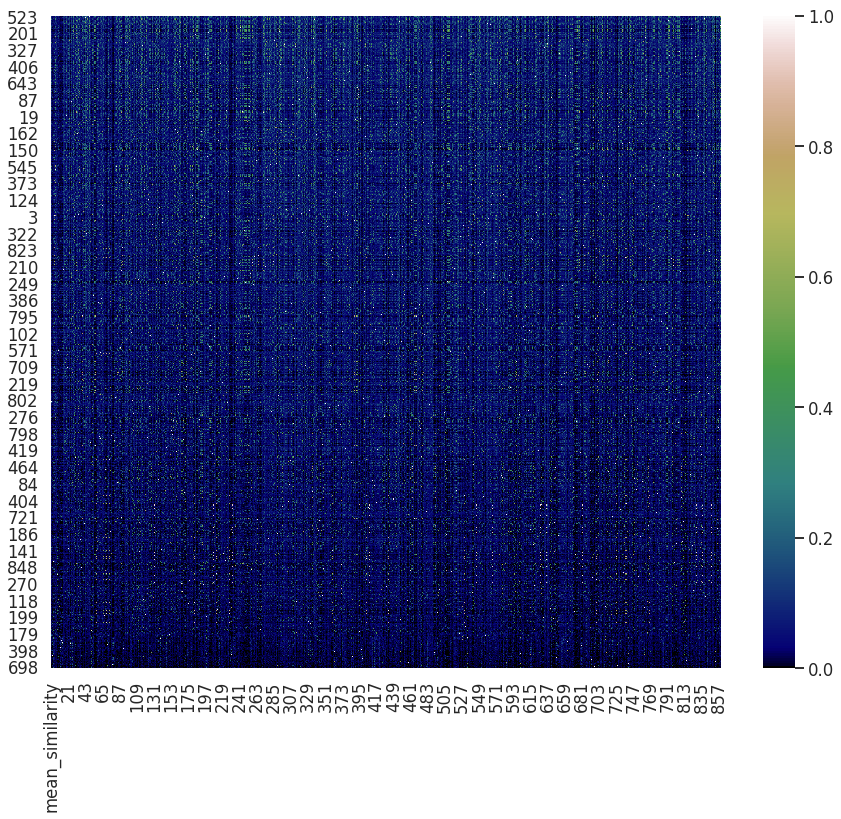

In [94]:
plt.figure(figsize=(15,12))
sns.heatmap(heat_df.sort_values(by='mean_similarity',ascending=False),cmap='gist_earth')
#sns.heatmap(heat_df,cmap='gist_earth')

plt.show()

In [96]:
#calculate the mean similarity between lectures
tf_sim.insert(0, 'mean_similarity', tf_sim.mean(axis=1))
#add identification to similarity dataframe
tf_sim['Subject'] = list(lectures.Subject)

In [104]:
#test the response on a lecture
lecture = lectures.title[62]
tf_sim[[lecture,'Subject','mean_similarity']].sort_values(by=[lecture],ascending=False)[:10]

title                            17. Succinct Structures I          Subject  \
title                                                                         
17. Succinct Structures I                         1.000000  Data Structures   
18. Succinct Structures II                        0.761937  Data Structures   
13. Integer Lower Bounds                          0.652982  Data Structures   
14. Sorting in Linear Time                        0.627629  Data Structures   
20. Dynamic Graphs II                             0.586059  Data Structures   
7. Memory Hierarchy Models                        0.565326  Data Structures   
9. Augmentation: Range Trees                      0.553778       Algorithms   
15. Static Trees                                  0.550702  Data Structures   
8. Cache-Oblivious Structures I                   0.517917  Data Structures   
3. Geometric Structures I                         0.505163  Data Structures   

title                            mean_similarity  
title                                             
17. Succinct Structures I               0.056662  
18. Succinct Structures II              0.060340  
13. Integer Lower Bounds                0.065812  
14. Sorting in Linear Time              0.064835  
20. Dynamic Graphs II                   0.066198  
7. Memory Hierarchy Models              0.074012  
9. Augmentation: Range Trees            0.071381  
15. Static Trees                        0.072879  
8. Cache-Oblivious Structures I         0.070827  
3. Geometric Structures I               0.080462

In [98]:
#what is the highest mean similarity?
tf_sim.sort_values(by='mean_similarity',ascending=False)[['mean_similarity','Subject']][:10]

title                                               mean_similarity  \
title                                                                 
Lec 34 | MIT 18.02 Multivariable Calculus, Fall...         0.113506   
Lec 28 | MIT 18.03 Differential Equations, Spri...         0.111477   
Review Session: Midterm Review                             0.111110   
Lec 3 | MIT 18.02 Multivariable Calculus, Fall ...         0.110760   
Lecture 22: Transformations and Convolutions | ...         0.108052   
Lecture 17: Moment Generating Functions | Stati...         0.106419   
Lec 30 | MIT 18.03 Differential Equations, Spri...         0.106413   
6. Probability Part 2                                      0.105837   
Lec 7 | MIT 18.02 Multivariable Calculus, Fall ...         0.105551   
Lecture 4: Word Window Classification and Neura...         0.104149   

title                                                  Subject  
title                                                           
Lec 34 | MIT 18.02 Multivariable Calculus, Fall...    Calculus  
Lec 28 | MIT 18.03 Differential Equations, Spri...   Diff. Eq.  
Review Session: Midterm Review                             NLP  
Lec 3 | MIT 18.02 Multivariable Calculus, Fall ...    Calculus  
Lecture 22: Transformations and Convolutions | ...  Statistics  
Lecture 17: Moment Generating Functions | Stati...  Statistics  
Lec 30 | MIT 18.03 Differential Equations, Spri...   Diff. Eq.  
6. Probability Part 2                               Statistics  
Lec 7 | MIT 18.02 Multivariable Calculus, Fall ...    Calculus  
Lecture 4: Word Window Classification and Neura...         NLP

In [99]:
tf_sim.groupby('Subject')['mean_similarity'].mean().mean()

0.06552274759985961

In [105]:
tf_sim['mean_similarity'].mean()

0.06288599649874262